<a href="https://colab.research.google.com/github/souparnabose99/text-classification-rnn-tensorflow/blob/main/Spam_Detection_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model

### Load Dataset:

In [2]:
pd.set_option('Display.max_columns', None)
df = pd.read_csv('SpamDataCollection', sep='\t', names = ['Label', 'Message'])
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
df.shape

(5572, 2)

In [5]:
df.describe()

,Label,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
df.columns

Index(['Label', 'Message'], dtype='object')

### Create Binary Labels:

In [7]:
df['Binary_Labels'] = df['Label'].map({'ham':0, 'spam':1})
y = df['Binary_Labels'].values
df.head()

,Label,Message,Binary_Labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


### Perform Train-Test split:

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df['Message'], y, test_size=0.33)

### Convert Sentences to Sequences:

In [9]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

In [10]:
word_2_index = tokenizer.word_index
len(word_2_index)

7203

### Add Padding:

In [11]:
data_train = pad_sequences(sequences_train)
data_train.shape

(3733, 189)

In [12]:
data_test = pad_sequences(sequences_test, maxlen=data_train.shape[1])
data_test.shape

(1839, 189)

### Create Model:

In [13]:
# Embedding dimensionality: D
D = 20

# Hidden state dimensionality: M
M = 15
V = len(word_2_index)
T = data_train.shape[1]
# Size of Embedding = (V+1) x D, since index starts from 1 not 0

i = Input(shape=(T,))
x = Embedding(V+1, D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)


### Compile & Fit model:

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
print("Training LSTM Model.....")
training_metrics = model.fit(data_train, y_train, epochs=10, validation_data=(data_test, y_test))

Training LSTM Model.....
Epoch 1/10
117/117 [==============================] - 12s 81ms/step - loss: 0.4487 - accuracy: 0.8615 - val_loss: 0.3528 - val_accuracy: 0.8630
Epoch 2/10
117/117 [==============================] - 9s 77ms/step - loss: 0.3104 - accuracy: 0.8674 - val_loss: 0.2880 - val_accuracy: 0.8630
Epoch 3/10
117/117 [==============================] - 9s 78ms/step - loss: 0.2286 - accuracy: 0.8674 - val_loss: 0.2178 - val_accuracy: 0.8630
Epoch 4/10
117/117 [==============================] - 9s 76ms/step - loss: 0.1666 - accuracy: 0.9234 - val_loss: 0.1712 - val_accuracy: 0.9636
Epoch 5/10
117/117 [==============================] - 9s 77ms/step - loss: 0.1163 - accuracy: 0.9938 - val_loss: 0.1319 - val_accuracy: 0.9815
Epoch 6/10
117/117 [==============================] - 9s 76ms/step - loss: 0.0844 - accuracy: 0.9981 - val_loss: 0.1123 - val_accuracy: 0.9821
Epoch 7/10
117/117 [==============================] - 9s 76ms/step - loss: 0.0649 - accuracy: 0.9987 - val_loss: 0.1

### PLot training metrics:

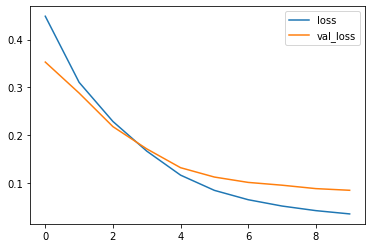

In [16]:
plt.plot(training_metrics.history['loss'], label='loss')
plt.plot(training_metrics.history['val_loss'], label='val_loss')
plt.legend()

In [17]:
metrics_df = pd.DataFrame(model.history.history)
metrics_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.448708,0.861506,0.352844,0.862969
1,0.310434,0.867399,0.287987,0.862969
2,0.228564,0.867399,0.217754,0.862969
3,0.166562,0.923386,0.171237,0.963567
4,0.116279,0.993839,0.131851,0.981512


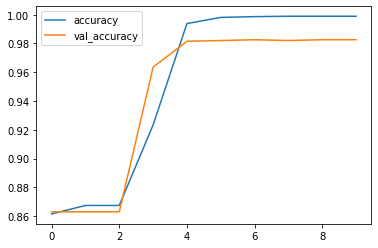

In [18]:
plt.plot(training_metrics.history['accuracy'], label='accuracy')
plt.plot(training_metrics.history['val_accuracy'], label='val_accuracy')
plt.legend()